<a href="https://colab.research.google.com/github/natashakarmali/nkarmali-uw.edu/blob/master/Bike_Rental_Usage_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Bike Sharing Usage

## Dataset Description

My dataset is hosted on the Unveristy of California Irvine's (UCI) Machine Learning Repository. It was orginally sourced from a bike sharing platform, Capital Bikeshare. UCI is a trusted instituion. Capital Bikeshare provided its data to provide transparency into the universe, so I do not have concerns about a data bias. The data is 6 years old, which is ideal for my analysis as I want to see how the industry looked when it was started. 

The data was collected by Capital Bikshare using user rides. The company removed staff useage from the dataset to provide an accurate picture of consumer habits. UCI then added data on the temperature and holiday schedule to provide more context

The data incldues binary, categorical, continuous types of data points. These datapoints include the user id (instant), date (dteday), season (1,2,3,4), year, month, hour, whether or not it was a holiday (0 or 1), day of the week (weekday), whether it was a working day (0 or 1), weather category (1-4), weather metrics in Celsius (temperature, feeling temperature, humidity, windspeed), type of rider (casual or registered), and the count of total riders. 

My goal with this analysis is to determine which attributes have the strongest corelation with bike rental useage

I want to look at steady state usage, so I will aim to remove outlier datapoints 

## Reading and Cleaning Dataset 

Reading in my dataset.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt 

In [0]:
df_bike= pd.read_csv("https://raw.githubusercontent.com/natashakarmali/nkarmali-uw.edu/master/hour.csv")
df_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Looking for null values.

In [0]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Looking at unique values for a couple column to see if there are any different null values that pandas would not automatically identify

In [0]:
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [0]:
test = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit']
for i in test:
  print(df_bike[i].unique())

[1 2 3 4]
[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[0 1]
[6 0 1 2 3 4 5]
[1 2 3 4]


Creating another column to bin count of bikers for later analysis

In [0]:
df_bike.cnt.describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [0]:
bins = list(range(0,1100, 200))

In [0]:
df_bike["cnt_bins"] = pd.cut(df_bike.cnt, bins=bins, labels=["0-200", "200-400", "400-600", "600-800", "800-1000"])

In [0]:
df_bike.cnt_bins.head()

0    0-200
1    0-200
2    0-200
3    0-200
4    0-200
Name: cnt_bins, dtype: category
Categories (5, object): [0-200 < 200-400 < 400-600 < 600-800 < 800-1000]

In [0]:
df_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_bins
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0-200
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0-200
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0-200
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0-200
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0-200


Encoding weathersit, hour, and season

In [0]:
feature_df = pd.DataFrame(df_bike.weathersit)

In [0]:
feature_df.head()

,weathersit
0,1
1,1
2,1
3,1
4,1


In [0]:
encoded = pd.get_dummies(feature_df["weathersit"])

In [0]:
encoded.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [0]:
encoded= encoded.rename(columns={1:"clear",2:"mist", 3: "snow", 4: "heavyrain"})

In [0]:
df_bike = df_bike.join(encoded)

In [0]:
hour_df = pd.DataFrame(df_bike.hr)

In [0]:
encoded_hr = pd.get_dummies(hour_df["hr"])

In [0]:
df_bike = df_bike.join(encoded_hr)

In [0]:
df_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_bins,clear,mist,snow,heavyrain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0-200,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0-200,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0-200,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0-200,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0-200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
feature_df2 = pd.DataFrame(df_bike.season)

In [0]:
encoded_season = pd.get_dummies(feature_df2["season"])

In [0]:
encoded_season.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [0]:
encoded_season= encoded_season.rename(columns={1:"spring", 2:"summer", 3: "fall", 4: "winter"})

In [0]:
encoded_season.head()

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [0]:
df_bike = df_bike.join(encoded_season)

I'm dropping temp as its redundant, what matters here is how warm/cold the user felt which is described with atemp. 

In [0]:
df_bike = df_bike.drop("temp", axis = 1)

In [0]:
df_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,cnt_bins,clear,mist,snow,heavyrain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,spring,summer,fall,winter
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.2879,0.81,0.0,3,13,16,0-200,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.2727,0.80,0.0,8,32,40,0-200,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.2727,0.80,0.0,5,27,32,0-200,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.2879,0.75,0.0,3,10,13,0-200,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.2879,0.75,0.0,0,1,1,0-200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Renaming columns headers for cnt to be more intuitive 

In [0]:
df_bike = df_bike.rename(columns={"cnt":"num_users", "cnt_bins":"num_users_bins"})

In [0]:
df_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,num_users,num_users_bins,clear,mist,snow,heavyrain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,spring,summer,fall,winter
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.2879,0.81,0.0,3,13,16,0-200,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.2727,0.80,0.0,8,32,40,0-200,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.2727,0.80,0.0,5,27,32,0-200,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.2879,0.75,0.0,3,10,13,0-200,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.2879,0.75,0.0,0,1,1,0-200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Exploratory Data Analysis

Plotting distribution of features

In [0]:
def plot_distro (df_bike, column_name):
    return df_bike[column_name].plot(kind='density')

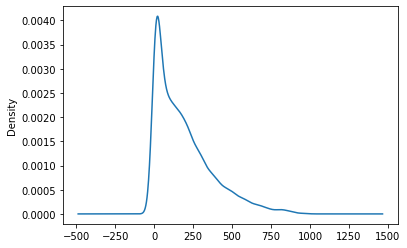

In [0]:
plot_distro(df_bike, "num_users")

In [0]:
from scipy.stats import zscore
df_bike["num_users_Zscore"] = zscore(df_bike.num_users)

This data is scewed to the right and likely contains many outliers

In [0]:
len(df_bike[abs(df_bike.num_users_Zscore) > 2.5])

505

There are a large amount of outliers. I'm going to plot the rest of the continous columns to see if the trend holds

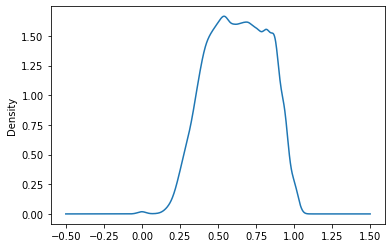

In [0]:
plot_distro (df_bike, "hum")

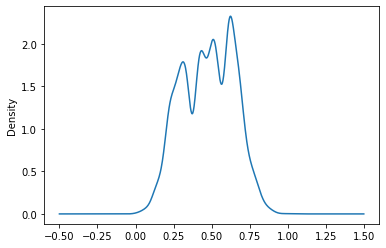

In [0]:
plot_distro (df_bike, "atemp")

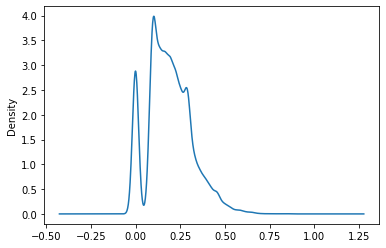

In [0]:
plot_distro (df_bike, "windspeed")

Looking at the numerical distribution of data

In [0]:
df_bike.windspeed.describe()

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

In [0]:
df_bike.atemp.describe()

count    17379.000000
mean         0.475775
std          0.171850
min          0.000000
25%          0.333300
50%          0.484800
75%          0.621200
max          1.000000
Name: atemp, dtype: float64

In [0]:
df_bike.hum.describe()

count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

The weather columns are already on the same scale but are not normally distributed. For my analysis, I want to look at usage in a steady state (not outliers). Evaluating the relationship between holidays and bike usage

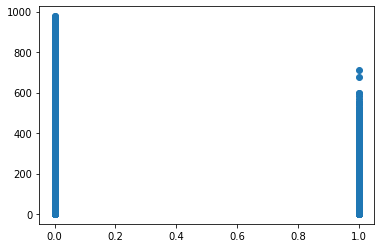

In [0]:
%matplotlib inline
plt.scatter(df_bike.holiday, df_bike.num_users)

In [0]:
df_bike[["num_users", "holiday"]].corr()

,num_users,holiday
num_users,1.000000,-0.030927
holiday,-0.030927,1.000000


There does not appear to be a corrletion. I attemped both MinMax Scalling and Standard Scaller. Standard Scaller produced better results, including below

In [0]:
df_bike.dtypes

instant                int64
dteday                object
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
num_users              int64
num_users_bins      category
clear                  uint8
mist                   uint8
snow                   uint8
heavyrain              uint8
0                      uint8
1                      uint8
2                      uint8
3                      uint8
4                      uint8
5                      uint8
6                      uint8
7                      uint8
8                      uint8
9                      uint8
10                     uint8
11                     uint8
12                     uint8
13            

In [0]:
df_bike["num_users"] = df_bike.num_users.astype(float)

In [0]:
from sklearn import preprocessing

In [0]:
standard_scaler = preprocessing.StandardScaler()

In [0]:
df_bike[["hum", "windspeed", "atemp", "num_users"]] = standard_scaler.fit_transform(df_bike[["hum", "windspeed", "atemp", "num_users"]])

Tessting for normality, not using Shapiro method as my sample size > 1000

In [0]:
from scipy.stats import anderson
result = anderson(df_bike.hum)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))
        

Test Statistic: 92.87520063267584
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


In [0]:
from scipy.stats import anderson
result = anderson(df_bike.windspeed)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 153.79320426890627
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


In [0]:
from scipy.stats import anderson
result = anderson(df_bike.atemp)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 114.93329972441279
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


In [0]:
from scipy.stats import anderson
result = anderson(df_bike.num_users)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 598.7079002142491
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


In [0]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(df_bike.hum)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 1705.6434642713257, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [0]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(df_bike.atemp)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 1854.8565754559982, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [0]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(df_bike.windspeed)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 986.0031793429366, Pvalue= 7.800636416698471e-215
Sample does not look Gaussian (reject H0)


In [0]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(df_bike.num_users)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 3459.8319080485735, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


Text(0.5, 1.0, 'Humidity')

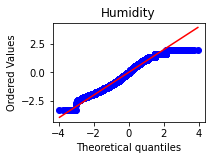

In [0]:
from scipy import stats
fig = plt.figure()
ax = fig.add_subplot(223)
stats.probplot(df_bike.hum, dist="norm", plot=plt)
ax.set_title("Humidity")

Text(0.5, 1.0, 'Windspeed')

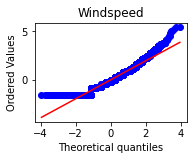

In [0]:
fig = plt.figure()
ax = fig.add_subplot(223)
stats.probplot(df_bike.windspeed, dist="norm", plot=plt)
ax.set_title("Windspeed")

Text(0.5, 1.0, 'Felt Temperature')

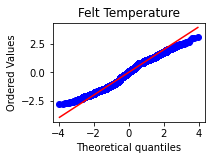

In [0]:
fig = plt.figure()
ax = fig.add_subplot(223)
stats.probplot(df_bike.atemp, dist="norm", plot=plt)
ax.set_title("Felt Temperature")

Text(0.5, 1.0, 'Number of Users')

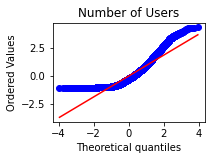

In [0]:
fig = plt.figure()
ax = fig.add_subplot(223)
stats.probplot(df_bike.num_users, dist="norm", plot=plt)
ax.set_title("Number of Users")

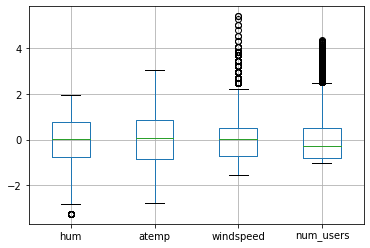

In [0]:
df_bike.boxplot(column= ["hum","atemp","windspeed", "num_users"])

Hum, windspeed, and num_users appear to have outliers. Determining how many use DBSCAN

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
outlier_detection = DBSCAN()

In [0]:
outliers_to_drop = df_bike[["hum", "windspeed", "num_users"]]

In [0]:
clusters = outlier_detection.fit_predict(outliers_to_drop)

In [0]:
outliers_to_drop['clusters'] = clusters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
outliers_to_drop.head()

,hum,windspeed,num_users,clusters
0,0.947372,-1.553889,-0.956339,0
1,0.895539,-1.553889,-0.824022,0
2,0.895539,-1.553889,-0.868128,0
3,0.636370,-1.553889,-0.972879,0
4,0.636370,-1.553889,-1.039037,0


In [0]:
outliers_to_drop.clusters.value_counts()

 1    15136
 0     2175
-1       48
 2       20
Name: clusters, dtype: int64

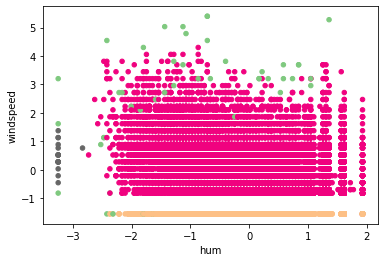

In [0]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
outliers_to_drop.plot.scatter(
  x = "hum",
  y = "windspeed",
  c = clusters,
  cmap = cmap,
  colorbar = False
)

There are clearly outliers in the dataset, now I'm going to count how many there are for each feature. 

In [0]:
df_bike["windspeed_Zscore"] = zscore(df_bike.windspeed)

In [0]:
df_bike["hum_Zscore"] = zscore(df_bike.hum)

In [0]:
df_bike["atemp_Zscore"] = zscore(df_bike.atemp)

In [0]:
df_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,num_users,num_users_bins,clear,mist,snow,heavyrain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,spring,summer,fall,winter,num_users_Zscore,windspeed_Zscore,hum_Zscore,atemp_Zscore
0,1,2011-01-01,1,0,1,0,0,6,0,1,-1.093281,0.947372,-1.553889,3,13,-0.956339,0-200,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.956339,-1.553889,0.947372,-1.093281
1,2,2011-01-01,1,0,1,1,0,6,0,1,-1.181732,0.895539,-1.553889,8,32,-0.824022,0-200,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.824022,-1.553889,0.895539,-1.181732
2,3,2011-01-01,1,0,1,2,0,6,0,1,-1.181732,0.895539,-1.553889,5,27,-0.868128,0-200,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.868128,-1.553889,0.895539,-1.181732
3,4,2011-01-01,1,0,1,3,0,6,0,1,-1.093281,0.636370,-1.553889,3,10,-0.972879,0-200,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.972879,-1.553889,0.636370,-1.093281
4,5,2011-01-01,1,0,1,4,0,6,0,1,-1.093281,0.636370,-1.553889,0,1,-1.039037,0-200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.039037,-1.553889,0.636370,-1.093281


In [0]:
len(df_bike[abs(df_bike.hum_Zscore) > 2.5])

28

In [0]:
len(df_bike[abs(df_bike.windspeed_Zscore) > 2.5])

230

In [0]:
len(df_bike[abs(df_bike.hum_Zscore) > 2.5])

28

In [0]:
len(df_bike[abs(df_bike.atemp_Zscore) > 2.5])

37

I looked at the number of outliers for num_users above. Now I'm going to remove the outliers because they are not a significant poriton of my dataset and will help me to answer my questions. This should also help normalize the data. 

In [0]:
df_bike = df_bike[abs(df_bike.windspeed_Zscore) < 2.5]

In [0]:
df_bike = df_bike[abs(df_bike.num_users_Zscore) < 2.5]

In [0]:
df_bike = df_bike[abs(df_bike.hum_Zscore) < 2.5]

In [0]:
df_bike = df_bike[abs(df_bike.atemp_Zscore) < 2.5]

In [0]:
df_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,num_users,num_users_bins,clear,mist,snow,heavyrain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,spring,summer,fall,winter,num_users_Zscore,windspeed_Zscore,hum_Zscore,atemp_Zscore
0,1,2011-01-01,1,0,1,0,0,6,0,1,-1.093281,0.947372,-1.553889,3,13,-0.956339,0-200,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.956339,-1.553889,0.947372,-1.093281
1,2,2011-01-01,1,0,1,1,0,6,0,1,-1.181732,0.895539,-1.553889,8,32,-0.824022,0-200,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.824022,-1.553889,0.895539,-1.181732
2,3,2011-01-01,1,0,1,2,0,6,0,1,-1.181732,0.895539,-1.553889,5,27,-0.868128,0-200,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.868128,-1.553889,0.895539,-1.181732
3,4,2011-01-01,1,0,1,3,0,6,0,1,-1.093281,0.636370,-1.553889,3,10,-0.972879,0-200,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.972879,-1.553889,0.636370,-1.093281
4,5,2011-01-01,1,0,1,4,0,6,0,1,-1.093281,0.636370,-1.553889,0,1,-1.039037,0-200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.039037,-1.553889,0.636370,-1.093281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,-1.269602,-0.141137,-0.211691,11,108,-0.388478,0-200,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,-0.388478,-0.211691,-0.141137,-1.269602
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,-1.269602,-0.141137,-0.211691,8,81,-0.553875,0-200,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,-0.553875,-0.211691,-0.141137,-1.269602
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,-1.269602,-0.141137,-0.211691,7,83,-0.548361,0-200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,-0.548361,-0.211691,-0.141137,-1.269602
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,-1.181732,-0.348473,-0.456099,13,48,-0.708245,0-200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,-0.708245,-0.456099,-0.348473,-1.181732


Re-evaluating the normality of my dataset after my changes. 

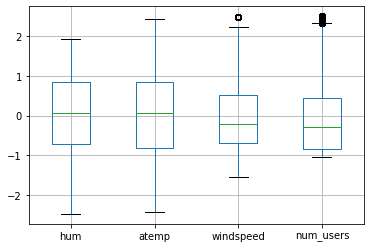

In [0]:
df_bike.boxplot(column= ["hum","atemp","windspeed", "num_users"])

Many outliers removed but still some left. I'm going to re-evaluate the distrubtion visually and numerically

In [0]:
df_bike.num_users.describe()

count    16590.000000
mean        -0.089073
std          0.856482
min         -1.039037
25%         -0.835049
50%         -0.294753
75%          0.427478
max          2.494933
Name: num_users, dtype: float64

In [0]:
df_bike.atemp.describe()

count    16590.000000
mean        -0.013725
std          0.992027
min         -2.415982
25%         -0.829089
50%          0.052518
75%          0.846255
max          2.433148
Name: atemp, dtype: float64

In [0]:
df_bike.hum.describe()

count    16590.000000
mean         0.034644
std          0.985618
min         -2.473659
25%         -0.711309
50%          0.066198
75%          0.843705
max          1.932215
Name: hum, dtype: float64

In [0]:
df_bike.windspeed.describe()

count    16590.000000
mean        -0.048411
std          0.935601
min         -1.553889
25%         -0.699689
50%         -0.211691
75%          0.519896
max          2.471886
Name: windspeed, dtype: float64

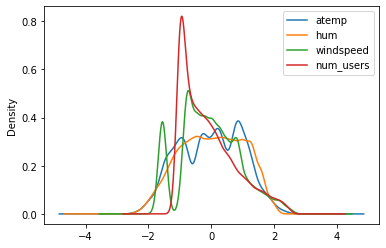

In [0]:
df_bike[["atemp", "hum", "windspeed", "num_users"]].plot(kind='density')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


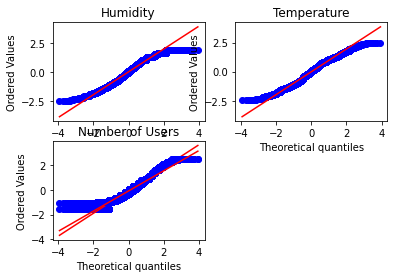

In [0]:
fig = plt.figure()
ax = fig.add_subplot(221)
stats.probplot(df_bike.hum, dist="norm", plot=plt)
ax.set_title("Humidity")

ax = fig.add_subplot(222)
stats.probplot(df_bike.atemp, dist="norm", plot=plt)
ax.set_title("Temperature")

ax = fig.add_subplot(223)
stats.probplot(df_bike.windspeed, dist="norm", plot=plt)
ax.set_title("Windspeed")

ax = fig.add_subplot(223)
stats.probplot(df_bike.num_users, dist="norm", plot=plt)
ax.set_title("Number of Users")

plt.show()

In [0]:
result = anderson(df_bike.hum)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))
        

Test Statistic: 93.16907934613118
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


In [0]:
result = anderson(df_bike.windspeed)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))
        

Test Statistic: 136.88114608802425
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


In [0]:
result = anderson(df_bike.atemp)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))
        

Test Statistic: 108.55658793706971
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


In [0]:
result = anderson(df_bike.num_users)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))
        

Test Statistic: 478.78579117958725
Significance: 15.0 
 Pval cutoff: 0.576 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.656 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.787 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.918 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.092 - Data does not look normal (reject H0)


I likely will not be able to use weather in my analysis because the weather features are more normalized but still not normal. Now I'm going to plot the correlation. 

In [0]:
corr = df_bike.corr()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


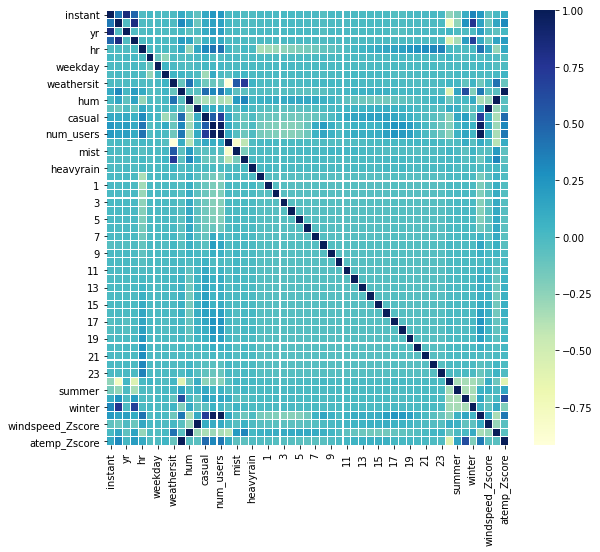

In [0]:
import seaborn as sns 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

Atemp, hr, fall, and hum have the strongest correlation with num_users. I'm going to subset these features to take a closer look at the relationship.

In [0]:
 df_bike[["num_users", "atemp", "hr", "hum", "fall"]].corr()

,num_users,atemp,hr,hum,fall
num_users,1.000000,0.396024,0.423199,-0.340713,0.144074
atemp,0.396024,1.000000,0.121386,-0.050687,0.623867
hr,0.423199,0.121386,1.000000,-0.271933,-0.008539
hum,-0.340713,-0.050687,-0.271933,1.000000,0.014072
fall,0.144074,0.623867,-0.008539,0.014072,1.000000


Taking a closer look at each hour of the day

In [0]:
df_bike[[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 'num_users']].corr()

,1,3,5,7,9,11,13,15,17,19,21,23,num_users
1,1.000000,-0.044143,-0.044908,-0.045302,-0.045138,-0.045006,-0.044177,-0.044344,-0.039483,-0.044577,-0.045105,-0.045237,-0.190760
3,-0.044143,1.000000,-0.044014,-0.044401,-0.044240,-0.044111,-0.043298,-0.043461,-0.038697,-0.043690,-0.044208,-0.044336,-0.216254
5,-0.044908,-0.044014,1.000000,-0.045169,-0.045006,-0.044875,-0.044047,-0.044214,-0.039367,-0.044446,-0.044973,-0.045104,-0.208933
7,-0.045302,-0.044401,-0.045169,1.000000,-0.045401,-0.045269,-0.044434,-0.044602,-0.039713,-0.044837,-0.045368,-0.045500,0.054453
9,-0.045138,-0.044240,-0.045006,-0.045401,1.000000,-0.045105,-0.044273,-0.044441,-0.039569,-0.044674,-0.045204,-0.045336,0.063779
11,-0.045006,-0.044111,-0.044875,-0.045269,-0.045105,1.000000,-0.044144,-0.044311,-0.039454,-0.044544,-0.045072,-0.045203,0.047573
13,-0.044177,-0.043298,-0.044047,-0.044434,-0.044273,-0.044144,1.000000,-0.043494,-0.038727,-0.043723,-0.044241,-0.044370,0.091715
15,-0.044344,-0.043461,-0.044214,-0.044602,-0.044441,-0.044311,-0.043494,1.000000,-0.038873,-0.043888,-0.044408,-0.044538,0.097273
17,-0.039483,-0.038697,-0.039367,-0.039713,-0.039569,-0.039454,-0.038727,-0.038873,1.000000,-0.039077,-0.039540,-0.039656,0.242918
19,-0.044577,-0.043690,-0.044446,-0.044837,-0.044674,-0.044544,-0.043723,-0.043888,-0.039077,1.000000,-0.044642,-0.044772,0.179988


Not a strong correlation with a specific hour. While running a regression on the the column hr, I was not able get consclusive results. So, I decided to use atemp instead as it was another continous feature. This feature is also not highly correlated with hr, hum, or fall.

I'm going to compare num_users and atemp for my analysis to see if there is a causal linear relationship. 

## Linear Regression


In [0]:
from sklearn import datasets, linear_model

In [0]:
df_bike_x = df_bike[["atemp"]]

In [0]:
df_bike_x.head()

,atemp
0,-1.093281
1,-1.181732
2,-1.181732
3,-1.093281
4,-1.093281


In [0]:
df_bike_y = df_bike[["num_users"]]

In [0]:
df_bike_y.head()

,num_users
0,-0.956339
1,-0.824022
2,-0.868128
3,-0.972879
4,-1.039037


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_bike_x, df_bike_y, 
                                                   test_size=0.2, 
                                                   random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,
                        n_jobs=4)

In [0]:
fit = lr.fit(x_train, y_train)

In [0]:
lr.intercept_

array([-0.08660412])

In [0]:
coef_df = pd.DataFrame({"feature": "atemp", 
                        "coeff": int(fit.coef_)},
                      index=[0])

In [0]:
coef_df

,feature,coeff
0,atemp,0


In [0]:
preds = lr.predict(x_test)

In [0]:
preds[0:5]

array([[-0.21904809],
       [-0.48999418],
       [ 0.41302701],
       [-0.2492415 ],
       [-0.58017711]])

Text(0, 0.5, 'Predictions')

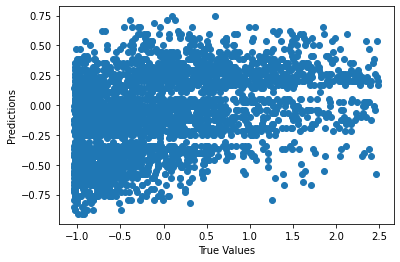

In [0]:
import matplotlib.pyplot as plt
plt.scatter(y_test, preds) 
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

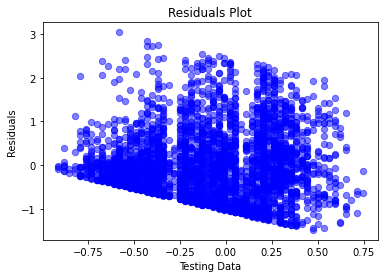

In [0]:
residuals = y_test - preds
plt.scatter(lr.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) 
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [0]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, preds)

In [0]:
MAE

0.619077695902247

In [0]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

In [0]:
rmse

0.7890987576954795

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.1573388451110479

## Conclusion

When initially looking at this dataset, I expected to see a correlation between weather and bike usage. For example, if it was warmer weather, more people would be outside using bikes. Or, if it was snowing, there would be less people outside using bikes. However, none of the weather situation columns had a high corelation with bike usage. 

In [0]:
df_bike[["num_users", "mist", "snow", "heavyrain", "clear"]].corr()

,num_users,mist,snow,heavyrain,clear
num_users,1.000000,-0.041089,-0.126918,-0.008568,0.111344
mist,-0.041089,1.000000,-0.179073,-0.008079,-0.824122
snow,-0.126918,-0.179073,1.000000,-0.004009,-0.408985
heavyrain,-0.008568,-0.008079,-0.004009,1.000000,-0.018451
clear,0.111344,-0.824122,-0.408985,-0.018451,1.000000


I did see a small positive relationship between atemp and num_users metrics (which had a p value of 0.4) so I decided to investigate this further. When looking at the relationship between atemp and bike useage we can see that there is an upwards trend, but also some decrease once you hit a certain threshold. Logically, this makes sense. As temperature increases, more people want to be outside riding bikes, but at a certain point it may become to hot to be outside

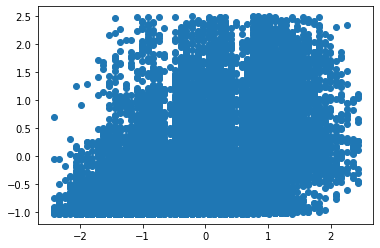

In [0]:
%matplotlib inline
plt.scatter(df_bike_x, df_bike_y)

To evelaute this relationship from a more statistical lens, I created a model and tested this relationship using linear regression showed that a increase in atemp would lead to a 0.04 increase in num_users. My results showed that there was not a strong linear relationship between these two features. In other words, you cannot use temperature to nessesarily fully predict in increase in biker usage. 

Manually plotting regression below

In [0]:
r_sq = df_bike[["atemp", "num_users"]].corr()

In [0]:
r_sq

,atemp,num_users
atemp,1.000000,0.396024
num_users,0.396024,1.000000


In [0]:
B1 = 0.400929 * (np.std(df_bike.atemp)/np.std(df_bike.num_users))

In [0]:
B1

0.46437930505894354

In [0]:
B0 = df_bike.atemp.mean() - (B1 * df_bike.num_users.mean())

In [0]:
df_bike["y_line"] = B0 + (B1 * df_bike.atemp)

Text(0.5, 0, 'Temperature')

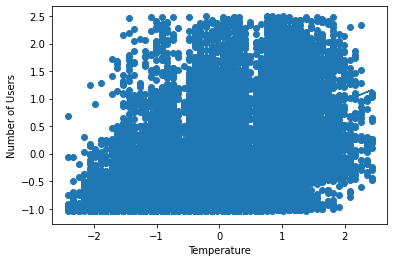

In [0]:
plt.scatter(df_bike.atemp,df_bike.num_users) 
plt.plot(df_bike.atemp, df_bike.y_line) 
plt.ylabel("Number of Users")
plt.xlabel("Temperature")

Text(0, 0.5, 'Predictions')

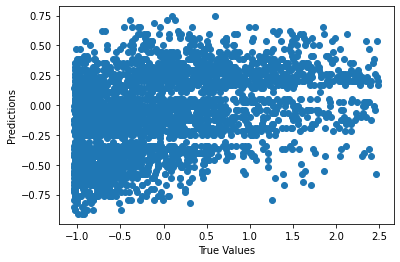

In [0]:
plt.scatter(y_test, preds) 
plt.xlabel("True Values")
plt.ylabel("Predictions")

While the MAE and RSME indicated a good fit, the R^2 demonstrated that 16% of the variation in bike usage could be explained by temperature. This analysis aligns with the information gathered from the scatter splot. There is some relationship between temperature and bike usage, but only for a limited threshold.

One limitation of this analysis was the amount of outliers included in the dataset. The entire dataset included outliers, but in paticular the num_users column ranged from 1 to 977 users with 505 instances outside 2.5 standard deviations from the mean. While scalling and dropping outliers helped to normalize num_users and the continuous weather columns, the data was still not perfectly normalized which could have affected the linear regression analysis. To more accuately gauge the relationship between weather and other attributes on increase in bike usage, it would be better to work with a more normalized dataset. Alternatively, looking at a larger sample size would lead to greater normalization within the data. Lastly, it would have been helpful to have a column to identify whether the was a major event on certain days that caused the spike in usage (ex. concert or sporting event). This additional datapoint would have helped to better understand the reltionships within the dataset. 

That said, there are still key takeways from this analysis that could have implications for the bike sharing industry. Executives can now see which temperatures tend to attract the greatest amouont of bikers. During the temperature threshold where there is a higer correlation with bike users, inventory should be ready to meet the increased demand. During the temperature threshold where the peak drops, executives may want to provide incentives (ie. reduced price) to artifically increase demand.

This analysis also demonstrated the high variability in bike usage throughout the year. Such a large range between the min and max of bike usage indicates that bike sharing companies need to be prepared for high volumes of user traffic. However, having a large inventory may not be the best solution due to the other extreme of only having one user on a pacticular day. The variability suggests that executives may need to consider ways of holding variable inventory. For example, holding a base inventory and calling on a temporary pool of additional bikes from a third party when needed. 